The **fastai** Deep Learning Library
===
> Documentation and tutorial: https://docs.fast.ai

In [13]:
# Requirements
# (update pip)
# fastai
# scikit-image

Package versions and available devices:

In [1]:
import fastai
import torch



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"fastai version : {fastai.__version__}")
print(f"PyTorch version: {torch.__version__}")
print(f"Number of GPUs : {torch.cuda.device_count()}")
print(f"Device         : {device}")

fastai version : 2.7.12
PyTorch version: 2.0.1
Number of GPUs : 0
Device         : cpu


In [2]:
from fastai.vision.all import *
from fastai.data.all import *

from pathlib import Path

***Location of training dataset (main folder that contains "yes"/"no" folders)***:
> The dataset is randomly split 80% training and 20% validation; (use seed for reproducibility, you need consistent train and val datasets to compare different models and training conditions)

- The original dataset contained images with either single channel. I manually removed these images into a separate folder.

- *Below, I assume all images have 3 channels*.

In [121]:
#
# data_path = Path('/mnt/mbi/images/micros/murat/dataDIR/maria_21072023/')
data_path = Path('../../dataDIR/maria_21072023/')

In [84]:
import skimage.io

def imread2pil(fpath):
    '''
    read the middle frame and convert to PIL image.
    
    Image files should contain 3 channels.
    '''
    # use print to test datasets:
    # print(fpath)
    
    im = skimage.io.imread(str(fpath))
    
    # assuming images have 3 channels:
    if im.ndim<4:
        im = im[np.newaxis,...]
    
    # later need to add separate normalization for each channel,
    # now using only 2nd ch:CH1 of CH:0-2
    im = np.uint8( 255 * (im/im[:,:,:,1].max()) )
    
    frame_id = im.shape[0]//2
    return PILImage.create(im[frame_id][:,:,1])

In [85]:
cell_dataset = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), 
                         get_items=get_image_files,
                         splitter=RandomSplitter(seed=42),
                         get_x=imread2pil,
                         get_y=parent_label,
                         item_tfms = Resize(224)
                        )

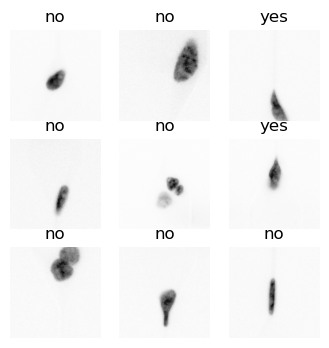

In [97]:
dls = cell_dataset.dataloaders(data_path)
dls.show_batch(max_n=9, figsize=(4,4))

In [117]:
# learn = vision_learner(dls, resnet34, metrics=error_rate)

In [118]:
# learn.fine_tune(1)

In [113]:
learn.predict(Resize(224)(pil_img_k))

('no', tensor(0), tensor([0.9435, 0.0565]))

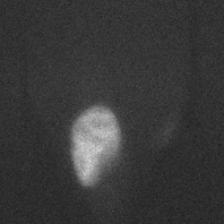

In [116]:
Resize(224)(pil_img_k)

# Fastai notes:

In [ ]:
import fastai
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"fastai version : {fastai.__version__}")
print(f"PyTorch version: {torch.__version__}")
print(f"Number of GPUs : {torch.cuda.device_count()}")
print(f"Device         : {device}")

In [5]:
print('Folder names (i.e. labels):\n',
      [p.name for p in data_path.ls() if p.is_dir()])

Folder names (i.e. labels):
 ['no', 'yes']


In [122]:
# image file names in the data_path/*/*
img_fns = get_image_files(data_path)

In [123]:
# image label
parent_label(img_fns[10])

'no'

In [140]:
img_fns[0].parents[1].name

'train'

In [56]:
tcat = Categorize(vocab=['no','yes'])
# To decode use: lbld = tcat.decode(lbl)
tcat.decode(1)

'yes'

Read sample image:

In [45]:
fn = img_fns[10]; fn

Path('../../dataDIR/maria_21072023/no/liveJun8-02.czi - liveJun8-02.czi #040-6_n.tif')

In [74]:
im1 = skimage.io.imread("../../dataDIR/maria_21072023/no/liveJun8-02.czi - liveJun8-02.czi #097-4_n.tif")
# im1 = im1 / im1[:,:,:,1].max()
im1.shape

(248, 172, 3)

In [96]:
# np.pad(im1[np.newaxis,...], ((0,10,10),(0,10,10)), constant_values=0)

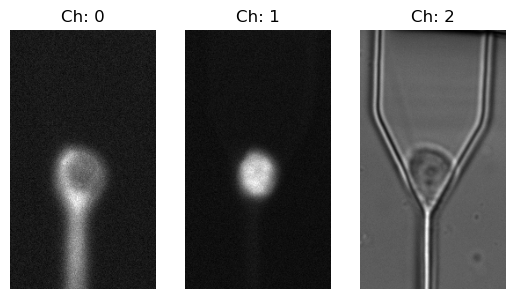

In [47]:
k = im1.shape[0]//2 # frame idx
img_k = im1[k] # select frame

_, axs = plt.subplots(ncols=im1.shape[-1])
cmps = ['gray','gray','gray']
for ch,ax in enumerate(axs):
    ax.imshow(img_k[:,:,ch], cmap=cmps[ch])
    ax.set_title(f'Ch: {ch}')
    ax.axis(False)
plt.show()

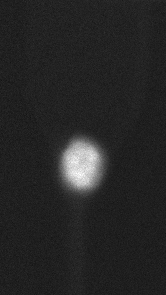

In [48]:
imgpil = PILImage.create(np.uint8(255*img_k[:,:,1]))
imgpil

In [49]:
tconv(imgpil)

TensorImage([[[27, 29, 32,  ..., 36, 37, 37],
              [31, 37, 40,  ..., 40, 34, 42],
              [29, 31, 32,  ..., 35, 39, 32],
              ...,
              [31, 32, 30,  ..., 27, 28, 29],
              [38, 28, 35,  ..., 31, 30, 36],
              [30, 30, 31,  ..., 25, 30, 34]]], dtype=torch.uint8)

In [50]:
tconv = ToTensor()

In [51]:
(tconv(img_k[:,:,:])).shape

(295, 166, 3)

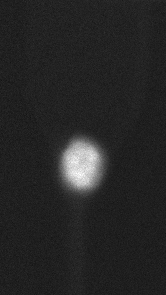

In [52]:
pil_img_k = imread2pil(fn); pil_img_k

In [35]:
tconv(pil_img_k)

TensorImage([[[10, 11, 11,  ..., 11, 11, 11],
              [13, 10, 11,  ..., 10, 10, 10],
              [11, 11, 11,  ..., 12, 10, 10],
              ...,
              [12, 11, 12,  ..., 10, 13, 11],
              [13, 14, 13,  ..., 12, 12, 14],
              [13, 10, 12,  ..., 10, 16, 12]]], dtype=torch.uint8)

In [120]:
pil_img_k = imread2pil(img_fns[230]); pil_img_k

FileNotFoundError: [Errno 2] No such file or directory: '/Users/muratshagirov/Documents/dataDIR/maria_21072023/yes/liveJun8-02.czi - liveJun8-02.czi #058-2_y.tif'

In [110]:
img_fns[230]

Path('../../dataDIR/maria_21072023/yes/liveJun8-02.czi - liveJun8-02.czi #058-2_y.tif')